In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
retailData = pd.read_csv('summer_internship_takehome.csv') #loading in data

In [3]:
retailData

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False
...,...,...,...,...,...,...,...,...,...
3991,333,8,TX,56295415.57,10711406.46,29142010.15,286920,4478,False
3992,333,9,TX,63512936.32,12675148.57,32346778.80,286920,4478,False
3993,333,10,TX,54062593.50,9784913.45,28299846.81,286920,4478,False
3994,333,11,TX,48903414.85,10638082.89,25285040.20,286920,4478,False


# Summary statistics and plots:

In [4]:
locations = retailData.groupby("Location number")
# grouping by location in order to find individual store profit margins

In [5]:
annualProfMargs = (locations["Gross revenue"].sum()\
                      -locations["Fixed cost"].sum()\
                      -locations["Rental cost"].sum()\
                      -locations["Variable cost"].sum())\
/locations["Gross revenue"].sum()
# calculating individual store profit margins

In [6]:
annualProfMargs.mean()

0.24863229256707506

In [7]:
annualProfMargs.median()

0.26184928404393765

#### First here is the mean and median annual profit margins of the stores using the raw data. A greater median than mean suggests a left skew of the data.

Text(0, 0.5, 'Amount of Stores')

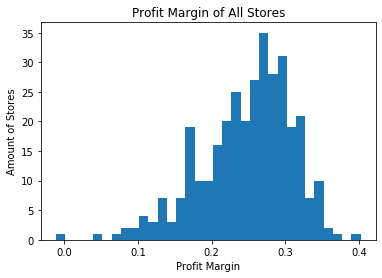

In [8]:
plt.hist(annualProfMargs,33)
plt.title("Profit Margin of All Stores")
plt.xlabel("Profit Margin")
plt.ylabel("Amount of Stores")

#### The profit margins accross all stores does appear roughly normally distributed with a slight left skew.

[9304129223.880001,
 9786842932.476,
 11587361200.937,
 9105208425.569,
 9347461485.046001,
 11297643513.466,
 9005478090.084,
 9625942279.996,
 11249652068.208,
 9413548683.985,
 8983799310.004002,
 11539819130.646]

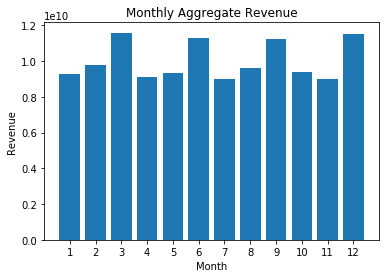

In [9]:
monthRev = []
for i in range(1,13):
    monthRev.append(retailData[retailData["Month"]==i]["Gross revenue"].sum())
    # summing all revenue by months
monthRev
plt.xticks(range(1,13))
plt.bar(range(1,13),monthRev)
plt.title("Monthly Aggregate Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

monthRev

#### This is the monthly aggregate revenue accross all stores. There seems to be a quarterly pattern except in the last quarter where revenue goes down between October and November.

Text(0, 0.5, 'Revenue')

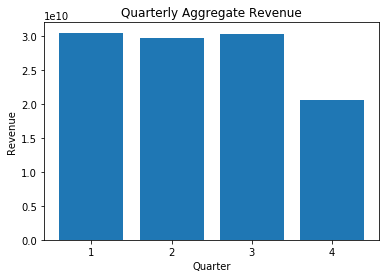

In [10]:
quarterRev = [sum(monthRev[1:4]),sum(monthRev[4:7]),\
              sum(monthRev[7:10]),sum(monthRev[10:13])] #aggregating quarter sums
plt.bar(range(1,5),quarterRev)
plt.xticks(range(1,5))
plt.title("Quarterly Aggregate Revenue")
plt.xlabel("Quarter")
plt.ylabel("Revenue")

#### In the quarterly aggregate revenue the drop in revenue in the 4th quarter is evident.

# Cleaning the data:

In [11]:
retailData["Rental cost"][103]

0

#### Since some stores are owned and have a rental cost of 0, a mean calculated by state imputation method will be used to clean the data.

In [12]:
retailData["Rental cost"].replace(0,np.nan,inplace=True)
#replacing 0's with nan's for true rental mean calculation
retailData["Rental cost"][103]

nan

In [13]:
states = set(list(retailData["State"]))

In [14]:
means = []
for state in states:
    means.append(retailData[retailData["State"]==state]["Rental cost"].mean())
    #calculating means by state

In [15]:
stateMeans = dict(zip(states,means))
stateMeans

{'WA': 165574.61538461538,
 'TX': 178770.88888888888,
 'CA': 162564.0,
 'CO': 159454.61538461538,
 'GA': 152734.0,
 'NJ': 165716.2068965517,
 'IL': 159050.0}

In [16]:
retailData["Rental cost"] = retailData["Rental cost"]\
.fillna(retailData["State"].map(stateMeans))
#filling nan's with respective state rental average

In [17]:
retailData["Rental cost"][103] #checking that nan's were replaced

162564.0

In [18]:
adjustedLocations = retailData.groupby("Location number")
# again grouping by location in order to find individual store profit margins

In [19]:
adjustedStoreProfMargs = (adjustedLocations["Gross revenue"].sum()\
                      -adjustedLocations["Fixed cost"].sum()\
                      -adjustedLocations["Rental cost"].sum()\
                      -adjustedLocations["Variable cost"].sum())\
/adjustedLocations["Gross revenue"].sum()


In [20]:
adjustedStoreProfMargs.mean()

0.24809132114362276

In [21]:
adjustedStoreProfMargs.median()

0.26018312192896237

#### Here are the recalculated rent-adjusted profit margin mean and medians

# Quantifying drivers of success:

Text(0, 0.5, 'Profit Margin')

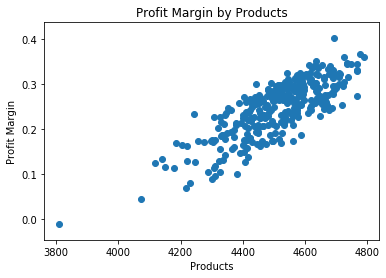

In [22]:
plt.scatter((retailData[retailData["Month"]==1]["Number of products"]),\
            adjustedStoreProfMargs)
plt.title("Profit Margin by Products")
plt.xlabel("Products")
plt.ylabel("Profit Margin")

#### A simple visualization of profit margin and number of products show that there is a positive correlation, but did not lead to much more analysis.

Text(0.5, 0, '')

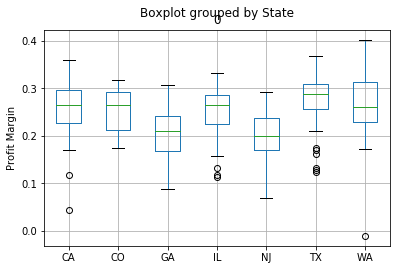

In [23]:
stateProfMargins = pd.DataFrame(adjustedStoreProfMargs)
stateProfMargins["State"] = list(retailData[retailData["Month"]==1]["State"])

stateProfMargins.boxplot(by="State")
plt.ylabel("Profit Margin")
plt.xlabel("")

In [24]:
(stateProfMargins.groupby("State")).describe()

0                                                              \
       count      mean       std       min       25%       50%       75%   
State                                                                      
CA      63.0  0.259021  0.057043  0.044470  0.226053  0.264592  0.296621   
CO      15.0  0.254362  0.052803  0.173336  0.210945  0.263814  0.292018   
GA      54.0  0.205485  0.054653  0.088220  0.167560  0.209918  0.241727   
IL      54.0  0.250199  0.052907  0.114035  0.224487  0.263889  0.286041   
NJ      32.0  0.194671  0.054796  0.068526  0.169315  0.198945  0.238131   
TX     101.0  0.278463  0.047826  0.123880  0.256788  0.288006  0.308521   
WA      14.0  0.251392  0.097852 -0.010842  0.228728  0.261054  0.312129   

                 
            max  
State            
CA     0.359975  
CO     0.318022  
GA     0.305915  
IL     0.332769  
NJ     0.291965  
TX     0.367030  
WA     0.402023

#### Boxplots help visualize which states have better profit margins and outliers as well as looking at the summary statistics.

In [25]:
profMargs = pd.DataFrame(adjustedStoreProfMargs)

In [26]:
profMargs.sort_values(0, ascending = False)

,0
Location number,
198,0.402023
233,0.367030
118,0.361596
9,0.359975
271,0.350652
...,...
111,0.088220
288,0.080338
126,0.068526


#### Next, here are the locations sorted by profit margin in order to compare the best and the worst store's expenses. Since it was clear revenue dropped in the 4th quarter an analysis of the cost breakdown of the top and bottom store throughout quarters was done.

In [27]:
retailData.loc[retailData["Location number"]==198]

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
2364,198,1,WA,18802946.30,4162175.29,9283934.01,180920.0,4694,False
2365,198,2,WA,17623557.43,4693759.00,8789028.55,180920.0,4694,False
2366,198,3,WA,19545446.97,4814755.71,9235640.01,180920.0,4694,False
2367,198,4,WA,17564996.58,3878221.72,9281113.88,180920.0,4694,False
2368,198,5,WA,14543902.75,3439749.07,7299293.49,180920.0,4694,False
2369,198,6,WA,16364383.15,4738800.79,8158277.37,180920.0,4694,False
2370,198,7,WA,29543244.07,4539250.46,6555242.51,180920.0,4694,False
2371,198,8,WA,31058442.45,4883629.12,7538673.30,180920.0,4694,False
2372,198,9,WA,38145094.11,5232967.58,12822486.06,180920.0,4694,False
2373,198,10,WA,24510185.72,4159488.66,8787309.72,180920.0,4694,False


In [28]:
store = retailData.loc[retailData["Location number"]==198]
fixed = store["Fixed cost"]
variable = store["Variable cost"]
rental = store["Rental cost"]

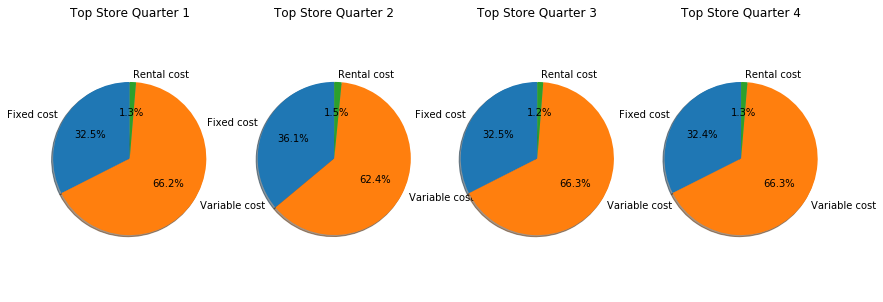

<Figure size 432x288 with 0 Axes>

In [29]:
fig1, axs = plt.subplots(1,4, figsize=(14,5))

axs[0].pie([fixed[1:4].mean(), variable[1:4].mean(), rental[1:4].mean()], labels = ["Fixed cost", "Variable cost", "Rental cost"], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].axis('equal')
axs[0].set_title('Top Store Quarter 1')

axs[1].pie([fixed[4:7].mean(), variable[4:7].mean(), rental[4:7].mean()], labels = ["Fixed cost", "Variable cost", "Rental cost"], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].axis('equal')
axs[1].set_title('Top Store Quarter 2')

axs[2].pie([fixed[7:10].mean(), variable[7:10].mean(), rental[7:10].mean()], labels = ["Fixed cost", "Variable cost", "Rental cost"], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[2].axis('equal')
axs[2].set_title('Top Store Quarter 3')

axs[3].pie([fixed[10:13].mean(), variable[10:13].mean(), rental[10:13].mean()], labels = ["Fixed cost", "Variable cost", "Rental cost"], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[3].axis('equal')
axs[3].set_title('Top Store Quarter 4')

plt.figure(2)
plt.show()

#### The top store maintains a pretty consistent cost breakdown across all quarters

In [30]:
store = retailData.loc[retailData["Location number"]==157]
fixed = store["Fixed cost"]
variable = store["Variable cost"]
rental = store["Rental cost"]

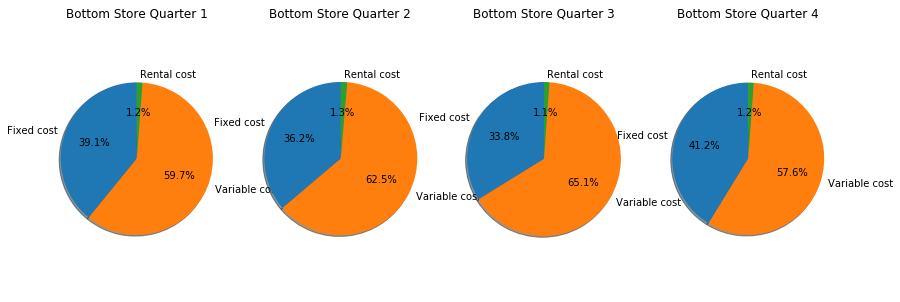

<Figure size 432x288 with 0 Axes>

In [31]:
fig1, axs = plt.subplots(1,4, figsize=(14,5))

axs[0].pie([fixed[1:4].mean(), variable[1:4].mean(), rental[1:4].mean()], labels = ["Fixed cost", "Variable cost", "Rental cost"], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].axis('equal')
axs[0].set_title('Bottom Store Quarter 1')

axs[1].pie([fixed[4:7].mean(), variable[4:7].mean(), rental[4:7].mean()], labels = ["Fixed cost", "Variable cost", "Rental cost"], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].axis('equal')
axs[1].set_title('Bottom Store Quarter 2')

axs[2].pie([fixed[7:10].mean(), variable[7:10].mean(), rental[7:10].mean()], labels = ["Fixed cost", "Variable cost", "Rental cost"], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[2].axis('equal')
axs[2].set_title('Bottom Store Quarter 3')

axs[3].pie([fixed[10:13].mean(), variable[10:13].mean(), rental[10:13].mean()], labels = ["Fixed cost", "Variable cost", "Rental cost"], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[3].axis('equal')
axs[3].set_title('Bottom Store Quarter 4')

plt.figure(2)
plt.show()

#### Whereas the bottom store has more of a varied cost breakdown across quarters with a clear larger percent in variable costs in the last quarter.

In [32]:
lowestStore = retailData.loc[retailData["Location number"]==157]

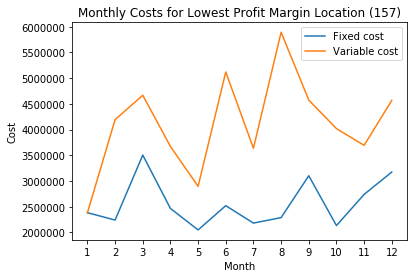

In [33]:
plt.plot('Month','Fixed cost', data = lowestStore)
plt.plot('Month','Variable cost', data = lowestStore)
plt.xticks(range(1,13))
plt.title("Monthly Costs for Lowest Profit Margin Location (157)")
plt.xlabel("Month")
plt.ylabel("Cost")
plt.legend()

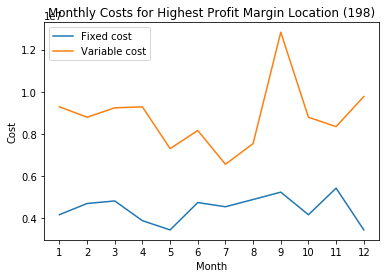

In [34]:
topStore = retailData.loc[retailData["Location number"]==198]
plt.plot('Month','Fixed cost', data = topStore)
plt.plot('Month','Variable cost', data = topStore)
plt.xticks(range(1,13))
plt.title("Monthly Costs for Highest Profit Margin Location (198)")
plt.xlabel("Month")
plt.ylabel("Cost")
plt.legend()

#### As the rental cost in both cases didn't seem to be a large percent of costs in either store, here is a plot of just the fixed and variable costs by month in top and bottom stores. Most interestingly here there is a patter seen in the lowest profit margin store where the costs increase and decrease at the same times. Whereas at the highest profit margin store they seem to behaving in opposite directions. Which could help offset expenses throughout the month.